<a href="https://colab.research.google.com/github/cwymichelle/Portfolio/blob/main/Cyclistic_CaseStudy_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Cyclistic Case Study using Python**

## **Background**
Cyclistic is a fictional bike-share company in Chicago seeking to explore the potential of casual riders to join the annual memberships. A case study is therefore established to analyze how casual riders and annual members use Cyclistic's bikes differently in order to convert more casual riders into annual members.

## **Stage 1: Ask**
Identifying the business task and objective, as well as key stakeholders in this study.
### **Business task**
* To distinguish the behaviour of casual riders and annual members in using Cyclistic's bikes
* To gain insights from analysis into how to maximize the number of annual members from casual riders
* To design new marketing strategy encouraging casual riders to pay for annual memberships

### **Key stakeholders**
##### **Primary stakeholder:**
* Lily Moreno (The director of marketing and manager of data analyst team)
* Cyclistic executive team

##### **Secondary stakeholder:**
* Cyclistic marketing analytics team

## **Stage 2: Prepare**
Collecting and managing data for analysis.

### **Data source**
* The dataset used is [Cyclistic’s historical trip data](https://divvy-tripdata.s3.amazonaws.com/index.html), which is  publicly available by Motivate International Inc. under this [license](https://ride.divvybikes.com/data-license-agreement).
* There are over 40 files in .CSV format from 2013 to Oct 2022 which are organized in long data.

### **Data credibility**
Determining whether the data fufill ROCCC approach.

* **Reliable**: The historical trip data with over 5 million records being automatically generated is reliable and unbiased
* **Original**: The data for public use is treated as third-party data
* **Comprehensive**: Lack of users' demographics and payment details due to data-privacy issues
* **Current**: The data is up to date as it involves the most recent 12 months for analysis
* **Cited**: The data is made available by credible organization is well documented on AWS

### **Data selection**
A one-year period from Nov 2021 to Oct 2022 is selected to analyze and identify trends, involving a total of 12 .CSV files below:
* 202111-divvy-tripdata.csv
* 202112-divvy-tripdata.csv
* 202201-divvy-tripdata.csv
* 202202-divvy-tripdata.csv
* 202203-divvy-tripdata.csv
* 202204-divvy-tripdata.csv
* 202205-divvy-tripdata.csv
* 202206-divvy-tripdata.csv
* 202207-divvy-tripdata.csv
* 202208-divvy-tripdata.csv
* 202209-divvy-tripdata.csv
* 202210-divvy-tripdata.csv

## **Stage 3: Process**
Data analysis involving cleaning, organization, manipulation and visualization will be performed in Python.<br>
Importing the required libraries.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

Importing data.

In [ ]:
nov21 = pd.read_csv('/content/202111-divvy-tripdata.csv')
dec21 = pd.read_csv('/content/202112-divvy-tripdata.csv')
jan22 = pd.read_csv('/content/202201-divvy-tripdata.csv')
feb22 = pd.read_csv('/content/202202-divvy-tripdata.csv')
mar22 = pd.read_csv('/content/202203-divvy-tripdata.csv')
apr22 = pd.read_csv('/content/202204-divvy-tripdata.csv')
may22 = pd.read_csv('/content/202205-divvy-tripdata.csv')
jun22 = pd.read_csv('/content/202206-divvy-tripdata.csv')
jul22 = pd.read_csv('/content/202207-divvy-tripdata.csv')
aug22 = pd.read_csv('/content/202208-divvy-tripdata.csv')
sep22 = pd.read_csv('/content/202209-divvy-tripdata.csv')
oct22 = pd.read_csv('/content/202210-divvy-tripdata.csv')

Previewing the .CSV files.

In [ ]:
nov21.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,7C00A93E10556E47,electric_bike,2021-11-27 13:27:38,2021-11-27 13:46:38,NaN,NaN,NaN,NaN,41.93,-87.72,41.96,-87.73,casual
1,90854840DFD508BA,electric_bike,2021-11-27 13:38:25,2021-11-27 13:56:10,NaN,NaN,NaN,NaN,41.96,-87.70,41.92,-87.70,casual
2,0A7D10CDD144061C,electric_bike,2021-11-26 22:03:34,2021-11-26 22:05:56,NaN,NaN,NaN,NaN,41.96,-87.70,41.96,-87.70,casual
3,2F3BE33085BCFF02,electric_bike,2021-11-27 09:56:49,2021-11-27 10:01:50,NaN,NaN,NaN,NaN,41.94,-87.79,41.93,-87.79,casual
4,D67B4781A19928D4,electric_bike,2021-11-26 19:09:28,2021-11-26 19:30:41,NaN,NaN,NaN,NaN,41.90,-87.63,41.88,-87.62,casual


In [ ]:
dec21.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,46F8167220E4431F,electric_bike,2021-12-07 15:06:07,2021-12-07 15:13:42,Laflin St & Cullerton St,13307,Morgan St & Polk St,TA1307000130,41.854833,-87.663660,41.871969,-87.650965,member
1,73A77762838B32FD,electric_bike,2021-12-11 03:43:29,2021-12-11 04:10:23,LaSalle Dr & Huron St,KP1705001026,Clarendon Ave & Leland Ave,TA1307000119,41.894405,-87.632331,41.967968,-87.650001,casual
2,4CF42452054F59C5,electric_bike,2021-12-15 23:10:28,2021-12-15 23:23:14,Halsted St & North Branch St,KA1504000117,Broadway & Barry Ave,13137,41.899357,-87.648522,41.937582,-87.644098,member
3,3278BA87BF698339,classic_bike,2021-12-26 16:16:10,2021-12-26 16:30:53,Halsted St & North Branch St,KA1504000117,LaSalle Dr & Huron St,KP1705001026,41.899390,-87.648545,41.894877,-87.632326,member
4,6FF54232576A3B73,electric_bike,2021-12-30 11:31:05,2021-12-30 11:51:21,Leavitt St & Chicago Ave,18058,Clark St & Drummond Pl,TA1307000142,41.895579,-87.682024,41.931248,-87.644336,member


Since the 12 .CSV files consist of identical columns, the dataset can be combined together to facilitate the analysis.<br>
Joining all files into 1 dataframe.

In [ ]:
df = pd.concat([nov21, dec21, jan22, feb22, mar22, apr22, may22, jun22, jul22, aug22, sep22, oct22], ignore_index = True)
df

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,7C00A93E10556E47,electric_bike,2021-11-27 13:27:38,2021-11-27 13:46:38,NaN,NaN,NaN,NaN,41.930000,-87.720000,41.960000,-87.730000,casual
1,90854840DFD508BA,electric_bike,2021-11-27 13:38:25,2021-11-27 13:56:10,NaN,NaN,NaN,NaN,41.960000,-87.700000,41.920000,-87.700000,casual
2,0A7D10CDD144061C,electric_bike,2021-11-26 22:03:34,2021-11-26 22:05:56,NaN,NaN,NaN,NaN,41.960000,-87.700000,41.960000,-87.700000,casual
3,2F3BE33085BCFF02,electric_bike,2021-11-27 09:56:49,2021-11-27 10:01:50,NaN,NaN,NaN,NaN,41.940000,-87.790000,41.930000,-87.790000,casual
4,D67B4781A19928D4,electric_bike,2021-11-26 19:09:28,2021-11-26 19:30:41,NaN,NaN,NaN,NaN,41.900000,-87.630000,41.880000,-87.620000,casual
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5755689,BC3BFA659C9AB6F1,classic_bike,2022-10-30 01:41:29,2022-10-30 01:57:16,Clifton Ave & Armitage Ave,TA1307000163,Lincoln Ave & Roscoe St*,chargingstx5,41.918216,-87.656936,41.943350,-87.670668,casual
5755690,ACD65450291CF95F,classic_bike,2022-10-30 01:41:54,2022-10-30 01:57:09,Clifton Ave & Armitage Ave,TA1307000163,Lincoln Ave & Roscoe St*,chargingstx5,41.918216,-87.656936,41.943350,-87.670668,casual
5755691,4AAC03D1438E97CA,classic_bike,2022-10-15 09:34:11,2022-10-15 10:03:21,Sedgwick St & North Ave,TA1307000038,Wabash Ave & Grand Ave,TA1307000117,41.911386,-87.638677,41.891466,-87.626761,casual
5755692,8E6F3F29785E5D40,classic_bike,2022-10-09 10:21:34,2022-10-09 10:43:45,Sedgwick St & North Ave,TA1307000038,Damen Ave & Clybourn Ave,13271,41.911386,-87.638677,41.931931,-87.677856,member


Determining data structure.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5755694 entries, 0 to 5755693
Data columns (total 13 columns):
 #   Column              Dtype  
---  ------              -----  
 0   ride_id             object 
 1   rideable_type       object 
 2   started_at          object 
 3   ended_at            object 
 4   start_station_name  object 
 5   start_station_id    object 
 6   end_station_name    object 
 7   end_station_id      object 
 8   start_lat           float64
 9   start_lng           float64
 10  end_lat             float64
 11  end_lng             float64
 12  member_casual       object 
dtypes: float64(4), object(9)
memory usage: 570.9+ MB


### **Data integrity**
Checking and cleaning up missing values if exist.

In [ ]:
df.isna().sum()

ride_id                    0
rideable_type              0
started_at                 0
ended_at                   0
start_station_name    878177
start_station_id      878177
end_station_name      940010
end_station_id        940010
start_lat                  0
start_lng                  0
end_lat                 5835
end_lng                 5835
member_casual              0
dtype: int64

A significant amount of missing values are found in columns related to station information. Since these information may not be indicative of analyzing the trends, the irrelevant columns are therefore removed to ensure data integrity.

In [ ]:
df.drop(columns = ['start_station_name', 'start_station_id', 'end_station_name', 'end_station_id', 'start_lat', 'start_lng', 
                   'end_lat', 'end_lng'], inplace = True)
df.head()

,ride_id,rideable_type,started_at,ended_at,member_casual
0,7C00A93E10556E47,electric_bike,2021-11-27 13:27:38,2021-11-27 13:46:38,casual
1,90854840DFD508BA,electric_bike,2021-11-27 13:38:25,2021-11-27 13:56:10,casual
2,0A7D10CDD144061C,electric_bike,2021-11-26 22:03:34,2021-11-26 22:05:56,casual
3,2F3BE33085BCFF02,electric_bike,2021-11-27 09:56:49,2021-11-27 10:01:50,casual
4,D67B4781A19928D4,electric_bike,2021-11-26 19:09:28,2021-11-26 19:30:41,casual


Rechecking if the missing values have been removed.

In [ ]:
df.isna().sum()

ride_id          0
rideable_type    0
started_at       0
ended_at         0
member_casual    0
dtype: int64

Removing any leading and trailing whitespaces from string in column *ride_id*.

In [ ]:
df['ride_id'] = df['ride_id'].str.strip()

Checking if any duplicate data exists.

In [ ]:
df[df['ride_id'].duplicated()]

,ride_id,rideable_type,started_at,ended_at,member_casual


Checking if any misspellings in columns *rideable_type* and *member_casual*.

In [ ]:
df.rideable_type.unique()

array(['electric_bike', 'classic_bike', 'docked_bike'], dtype=object)

In [ ]:
df.member_casual.unique()

array(['casual', 'member'], dtype=object)

According to the list of data structure, datatype of columns *started_at* and *ended_at* is object, i.e. string.<br>
Converting them to datetime type.

In [ ]:
df['started_at'] = pd.to_datetime(df['started_at'])
df['ended_at'] = pd.to_datetime(df['ended_at'])

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5755694 entries, 0 to 5755693
Data columns (total 5 columns):
 #   Column         Dtype         
---  ------         -----         
 0   ride_id        object        
 1   rideable_type  object        
 2   started_at     datetime64[ns]
 3   ended_at       datetime64[ns]
 4   member_casual  object        
dtypes: datetime64[ns](2), object(3)
memory usage: 219.6+ MB


Creating new column *ride_duration* in minutes and then changing its datatype to int64.

In [ ]:
df['ride_duration'] = (df['ended_at'] - df['started_at'])/pd.Timedelta(minutes=1)
df['ride_duration'] = df['ride_duration'].astype('int64')

df.head()

,ride_id,rideable_type,started_at,ended_at,member_casual,ride_duration
0,7C00A93E10556E47,electric_bike,2021-11-27 13:27:38,2021-11-27 13:46:38,casual,19
1,90854840DFD508BA,electric_bike,2021-11-27 13:38:25,2021-11-27 13:56:10,casual,17
2,0A7D10CDD144061C,electric_bike,2021-11-26 22:03:34,2021-11-26 22:05:56,casual,2
3,2F3BE33085BCFF02,electric_bike,2021-11-27 09:56:49,2021-11-27 10:01:50,casual,5
4,D67B4781A19928D4,electric_bike,2021-11-26 19:09:28,2021-11-26 19:30:41,casual,21


Sorting the column *ride_duration* in ascending order and getting some negative values, which means an error exists when ended time is earlier than started time.

In [ ]:
df.sort_values(by='ride_duration')

,ride_id,rideable_type,started_at,ended_at,member_casual,ride_duration
4913465,E137518FFE807752,electric_bike,2022-09-28 11:04:32,2022-09-21 06:31:11,member,-10353
5351260,918F745F62CAC29E,classic_bike,2022-10-13 14:42:10,2022-10-13 11:53:28,member,-168
2702718,38B9F148CE80499B,electric_bike,2022-06-07 19:23:03,2022-06-07 17:05:38,casual,-137
2243155,B897BE02B21FA75E,electric_bike,2022-06-07 19:15:39,2022-06-07 17:05:37,casual,-130
2418323,BF114472ABA0289C,electric_bike,2022-06-07 19:14:47,2022-06-07 17:05:42,member,-129
...,...,...,...,...,...,...
894361,23697816035F9A8F,docked_bike,2022-03-05 19:08:58,2022-03-29 15:43:02,casual,34354
173598,C8DD5E89BE2DAD7B,docked_bike,2021-11-06 16:53:11,2021-12-01 00:10:54,casual,34997
2727114,94DD1FB2367EA8B6,docked_bike,2022-06-15 07:56:59,2022-07-10 04:57:37,casual,35820
2072215,DCFE0DB8022DFABC,docked_bike,2022-05-08 00:28:53,2022-06-02 04:46:41,casual,36257


Not only negative value in duration, the value smaller than 1 is also considered as invalid record due to the possibility of relocking the bikes by users for security reasons.<br>
Finding out the number of invalid records.

In [ ]:
df[df['ride_duration'] < 1].count()

ride_id          118453
rideable_type    118453
started_at       118453
ended_at         118453
member_casual    118453
ride_duration    118453
dtype: int64

Removing these 118453 invalid records.

In [ ]:
df = df.drop(df[df.ride_duration < 1].index)
df

,ride_id,rideable_type,started_at,ended_at,member_casual,ride_duration
0,7C00A93E10556E47,electric_bike,2021-11-27 13:27:38,2021-11-27 13:46:38,casual,19
1,90854840DFD508BA,electric_bike,2021-11-27 13:38:25,2021-11-27 13:56:10,casual,17
2,0A7D10CDD144061C,electric_bike,2021-11-26 22:03:34,2021-11-26 22:05:56,casual,2
3,2F3BE33085BCFF02,electric_bike,2021-11-27 09:56:49,2021-11-27 10:01:50,casual,5
4,D67B4781A19928D4,electric_bike,2021-11-26 19:09:28,2021-11-26 19:30:41,casual,21
...,...,...,...,...,...,...
5755689,BC3BFA659C9AB6F1,classic_bike,2022-10-30 01:41:29,2022-10-30 01:57:16,casual,15
5755690,ACD65450291CF95F,classic_bike,2022-10-30 01:41:54,2022-10-30 01:57:09,casual,15
5755691,4AAC03D1438E97CA,classic_bike,2022-10-15 09:34:11,2022-10-15 10:03:21,casual,29
5755692,8E6F3F29785E5D40,classic_bike,2022-10-09 10:21:34,2022-10-09 10:43:45,member,22


Creating new columns *year*, *month*, *day_of_week* and *start_time* (in 24-hour format) by extracting from *started_at* in datetime type.

In [ ]:
df['year'] = df['started_at'].dt.year
df['month'] = df['started_at'].dt.month
df['day_of_week'] = df['started_at'].dt.day_name()
df['start_time'] = df['started_at'].dt.hour

df

,ride_id,rideable_type,started_at,ended_at,member_casual,ride_duration,year,month,day_of_week,start_time
0,7C00A93E10556E47,electric_bike,2021-11-27 13:27:38,2021-11-27 13:46:38,casual,19,2021,11,Saturday,13
1,90854840DFD508BA,electric_bike,2021-11-27 13:38:25,2021-11-27 13:56:10,casual,17,2021,11,Saturday,13
2,0A7D10CDD144061C,electric_bike,2021-11-26 22:03:34,2021-11-26 22:05:56,casual,2,2021,11,Friday,22
3,2F3BE33085BCFF02,electric_bike,2021-11-27 09:56:49,2021-11-27 10:01:50,casual,5,2021,11,Saturday,9
4,D67B4781A19928D4,electric_bike,2021-11-26 19:09:28,2021-11-26 19:30:41,casual,21,2021,11,Friday,19
...,...,...,...,...,...,...,...,...,...,...
5755689,BC3BFA659C9AB6F1,classic_bike,2022-10-30 01:41:29,2022-10-30 01:57:16,casual,15,2022,10,Sunday,1
5755690,ACD65450291CF95F,classic_bike,2022-10-30 01:41:54,2022-10-30 01:57:09,casual,15,2022,10,Sunday,1
5755691,4AAC03D1438E97CA,classic_bike,2022-10-15 09:34:11,2022-10-15 10:03:21,casual,29,2022,10,Saturday,9
5755692,8E6F3F29785E5D40,classic_bike,2022-10-09 10:21:34,2022-10-09 10:43:45,member,22,2022,10,Sunday,10


A clean data containing 5637241 records is available for further analysis.

## **Stage 4: Analyze**
Generating a variety of pivot tables to identify the trends between casual riders and annual members.

Counting the number of casual riders and annual members over a one-year period.

In [ ]:
df1 = df.groupby('member_casual')[['ride_id']].count()
df1

,ride_id
member_casual,
casual,2306138
member,3331103


Counting the number of casual riders and annual members in each month.

In [ ]:
df2 = pd.pivot_table(df, values='ride_id', index=['year', 'month', 'member_casual'], aggfunc=['count'], margins=True, 
                     margins_name='Total')
df2

count
                           ride_id
year  month member_casual         
2021  11    casual          105373
            member          248699
      12    casual           68752
            member          174878
2022  1     casual           18154
            member           83765
      2     casual           20981
            member           92070
      3     casual           88343
            member          190601
      4     casual          124080
            member          239853
      5     casual          275125
            member          347319
      6     casual          361929
            member          391891
      7     casual          397648
            member          408026
      8     casual          351164
            member          417206
      9     casual          290384
            member          395425
      10    casual          204205
            member          341370
Total                      5637241

Counting the number of casual riders and annual members on each weekday.

In [ ]:
df3 = pd.pivot_table(df, values='ride_id', index=['day_of_week', 'member_casual'], aggfunc=['count'], margins=True, 
                     margins_name='Total')
df3

count
                           ride_id
day_of_week member_casual         
Friday      casual          332178
            member          466696
Monday      casual          279422
            member          479665
Saturday    casual          475421
            member          444157
Sunday      casual          389058
            member          387001
Thursday    casual          300917
            member          521643
Tuesday     casual          259090
            member          513144
Wednesday   casual          270052
            member          518797
Total                      5637241

Counting the number of casual riders and annual members in each hour to start riding.

In [ ]:
df4 = pd.pivot_table(df, values='ride_id', index=['start_time', 'member_casual'], aggfunc=['count'], margins=True, 
                     margins_name='Total')
df4

count
                          ride_id
start_time member_casual         
0          casual           45964
           member           35600
1          casual           29860
           member           21923
2          casual           18800
           member           12623
3          casual           11114
           member            7860
4          casual            7669
           member            8833
5          casual           12395
           member           32683
6          casual           28721
           member           89748
7          casual           50688
           member          171049
8          casual           68031
           member          202521
9          casual           71658
           member          143926
10         casual           92909
           member          136381
11         casual          121165
           member          163302
12         casual          144272
           member          188650
13         casual          150989
           member          188018
14         casual          160074
           member          186022
15         casual          177014
           member          221093
16         casual          195675
           member          289177
17         casual          217647
           member          345876
18         casual          195682
           member          282941
19         casual          150215
           member          204307
20         casual          110861
           member          144185
21         casual           94788
           member          111917
22         casual           85969
           member           86009
23         casual           63978
           member           56459
Total                     5637241

Calculating the average duration that casual riders and annual members take for a ride over a one-year period.

In [ ]:
df5 = df.groupby(['member_casual'])[['ride_duration']].mean()
df5

,ride_duration
member_casual,
casual,29.264905
member,12.487977


Calculating the average duration that casual riders and annual members take for a ride on a monthly basis.

In [ ]:
df6 = pd.pivot_table(df, values='ride_duration', index=['year', 'month', 'member_casual'], aggfunc=['mean'])
df6

mean
                         ride_duration
year month member_casual              
2021 11    casual            22.971710
           member            11.007740
     12    casual            23.335321
           member            10.691253
2022 1     casual            30.490305
           member            11.694276
     2     casual            26.762785
           member            11.170164
     3     casual            32.694226
           member            11.682541
     4     casual            29.591280
           member            11.232242
     5     casual            30.964514
           member            13.142204
     6     casual            32.231543
           member            13.794532
     7     casual            29.397263
           member            13.534380
     8     casual            29.457111
           member            13.198219
     9     casual            28.093159
           member            12.777824
     10    casual            26.504993
           member            11.748959

Calculating the average duration that casual riders and annual members take for a ride on a daily basis.

In [ ]:
df7 = pd.pivot_table(df, values='ride_duration', index=['day_of_week', 'member_casual'], aggfunc=['mean'])
df7

mean
                          ride_duration
day_of_week member_casual              
Friday      casual            27.975889
            member            12.245453
Monday      casual            29.375146
            member            12.052543
Saturday    casual            32.811121
            member            14.009357
Sunday      casual            34.047836
            member            13.900158
Thursday    casual            25.481329
            member            12.006470
Tuesday     casual            26.052850
            member            11.885348
Wednesday   casual            24.900371
            member            11.833018

Counting the number of different Cyclistic's bikes rented by casual riders and annual members.

In [ ]:
df8 = pd.pivot_table(df, values='ride_id', index=['rideable_type', 'member_casual'], aggfunc=['count'], margins=True, 
                     margins_name='Total')
df8

count
                             ride_id
rideable_type member_casual         
classic_bike  casual          884841
              member         1714584
docked_bike   casual          180672
electric_bike casual         1240625
              member         1616519
Total                        5637241

## **Stage 5: Share**
Analyzing the behavior of casual riders and annual members with data visualizations.

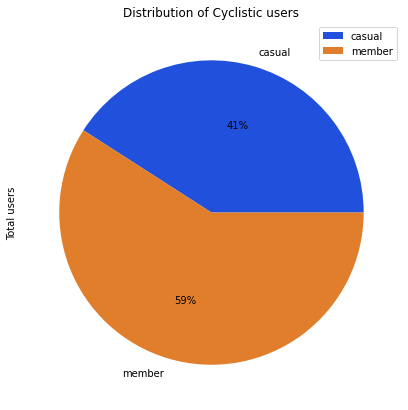

In [ ]:
df1['ride_id'].plot.pie(x='member_casual', legend=True, colors=['#2050dc', '#e07e2c'], autopct='%.0f%%', 
                        title='Distribution of Cyclistic users', figsize = (7,7))

plt.ylabel('Total users')
plt.show()

* The pie chart shows the distribution of Cyclistic users over a one-year period.
* More than half of total users, i.e. 59%, have been applied for annual member while 41% are casual riders.
* Despite the majority of annual members, there are still 2306138 casual riders using Cyclistic's bikes in one year, which cannot be ignorable to the contribution of annual memberships.

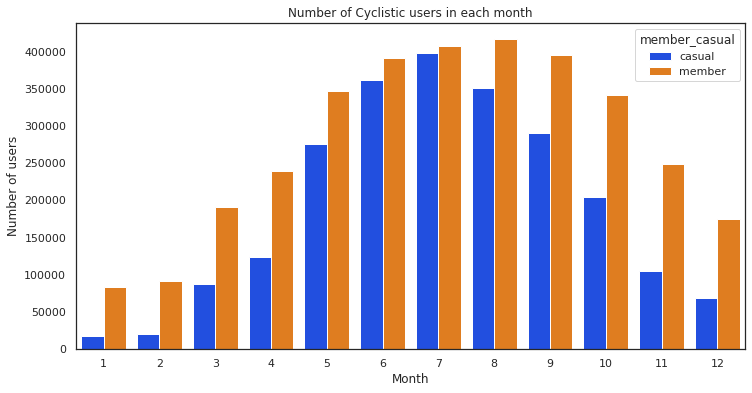

In [ ]:
df2 = df[['year', 'month', 'member_casual', 'ride_id']]
df2 = df.groupby(['year', 'month', 'member_casual'], as_index=False)[['ride_id']].count()

plt.figure(figsize=(12,6))
sns.set(style='white')
sns.barplot(data=df2, x='month', y='ride_id', hue='member_casual', 
            palette='bright').set_title('Number of Cyclistic users in each month')

plt.xlabel('Month')
plt.ylabel('Number of users')
plt.show()

* The bar chart on a monthly basis is used to determine whether seasonality affects the behaviour of casual riders and annual members.
* A similar pattern is observed when comparing casual members and annual members, which indicates that they tend to use bikes in warmer months.
* The difference in number between casual riders and annual members is smaller during warmer months, and larger during colder months. This implies most of casual riders use bikes for leisure while annual members use for commuting to work or school.

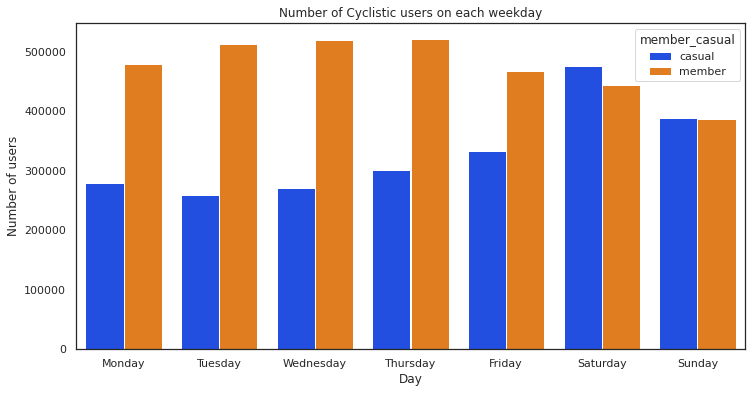

In [ ]:
df3 = df[['day_of_week', 'member_casual', 'ride_id']]
df3 = df.groupby(['day_of_week', 'member_casual'], as_index=False)[['ride_id']].count()

day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

plt.figure(figsize=(12,6))
sns.set(style='white')
sns.barplot(data=df3, x='day_of_week', y='ride_id', hue='member_casual', 
            palette='bright', order=day_order).set_title('Number of Cyclistic users on each weekday')

plt.xlabel('Day')
plt.ylabel('Number of users')
plt.show()

* The bar chart on a daily basis displays which day of the week is popular for casual riders and annual members.
* The number of casual riders is greater than annual members on weekends, whereas on weekdays it is opposite.
* More annual members use bikes on weekdays instead of weekends.
* The findings support the claim that more casual riders on weekends travel by bikes for leisure, and they do not tend to sign up for annual memberships without the purpose of communting needs.

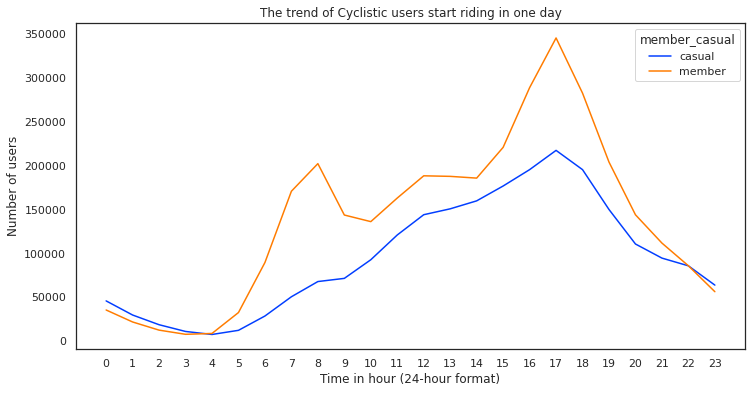

In [ ]:
df4 = df[['start_time', 'member_casual', 'ride_id']]
df4 = df.groupby(['start_time', 'member_casual'], as_index=False)[['ride_id']].count()

plt.figure(figsize = (12,6))
sns.set(style='white')
sns.lineplot(data=df4, x='start_time', y='ride_id', hue='member_casual', 
             palette='bright').set_title('The trend of Cyclistic users start riding in one day')

plt.xticks(range(24))
plt.xlabel('Time in hour (24-hour format)')
plt.ylabel('Number of users')
plt.show()

* The line chart indicates how many Cyclistic users start to rent bike for riding in terms of the period of day, which exhibits the difference in trend between casual riders and annual members.
* For casual riders, an upward trend between 04:00 and around 17:00 is observed. It is believed that the number of casual riders is significant during this time interval due to leisure activity.
* For annual members on the other hand, the number increases from 04:00 to 08:00 and then slightly decreases until around 11:00, followed by an increasing trend to 17:00. This tendency can be explained that many of annual members use bikes for commuting, resulting in achieving two peaks at around 08:00 and 17:00.

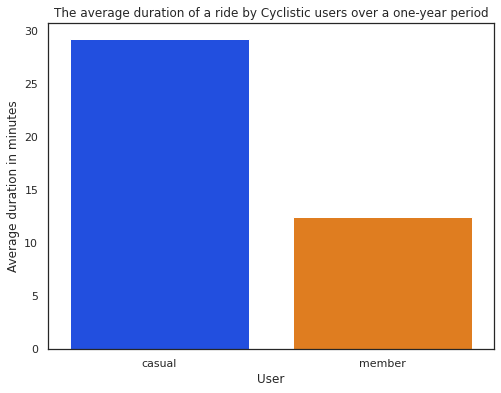

In [ ]:
df5 = df[['ride_duration', 'member_casual']]
df5 = df.groupby(['member_casual'], as_index=False)[['ride_duration']].mean()

plt.figure(figsize = (8,6))
sns.set(style='white')
sns.barplot(data=df5, x='member_casual', y='ride_duration', 
            palette='bright').set_title('The average duration of a ride by Cyclistic users over a one-year period')

plt.xlabel('User')
plt.ylabel('Average duration in minutes')
plt.show()

* The bar chart displays that casual riders take approx. 29 minutes of duration on yearly average, which is nearly twice that of annual members, i.e. approx. 12 minutes.

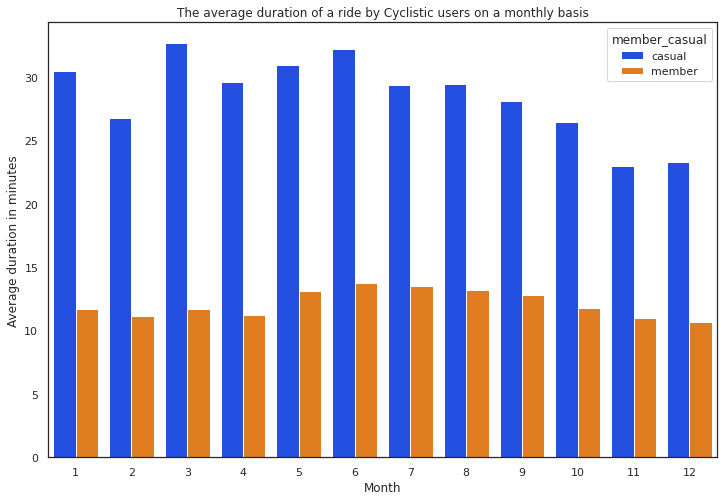

In [ ]:
df6 = df[['year', 'month', 'member_casual', 'ride_duration']]
df6 = df6.groupby(['year', 'month', 'member_casual'], as_index=False)[['ride_duration']].mean()

plt.figure(figsize=(12,8))
sns.set(style='white')
sns.barplot(data=df6, x='month', y='ride_duration', hue='member_casual', 
            palette='bright').set_title('The average duration of a ride by Cyclistic users on a monthly basis')

plt.xlabel('Month')
plt.ylabel('Average duration in minutes')
plt.show()

* Similarly, the average durations of casual riders measured in 12 months are almost double that of annual members.
* Besides, the trend points out that seasonality does not significantly affect how long the duration of a ride both casual riders and annual members have.

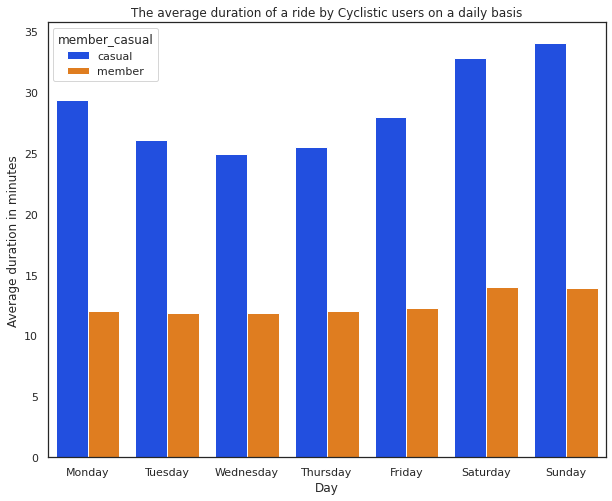

In [ ]:
df7 = df[['day_of_week', 'member_casual', 'ride_duration']]
df7 = df7.groupby(['day_of_week', 'member_casual'], as_index=False)[['ride_duration']].mean()

day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

plt.figure(figsize=(10,8))
sns.set(style='white')
sns.barplot(data=df7, x='day_of_week', y='ride_duration', hue='member_casual', 
            palette='bright', order=day_order).set_title('The average duration of a ride by Cyclistic users on a daily basis')

plt.xlabel('Day')
plt.ylabel('Average duration in minutes')
plt.show()

* For the measurement of average duration on a daily basis, the chart clearly shows that on weekends, the duration of casual riders is nearly triple that of annual members, while on weekdays it reduces to twice.
* This difference means that most of casual riders are willing to extend longer time of riding on weekends as leisure activity.
* The average duration of annual members on weekends is not much more than weekdays. It could be a strong evidence that most users having purchased current annual memberships is mainly for their commuting needs.

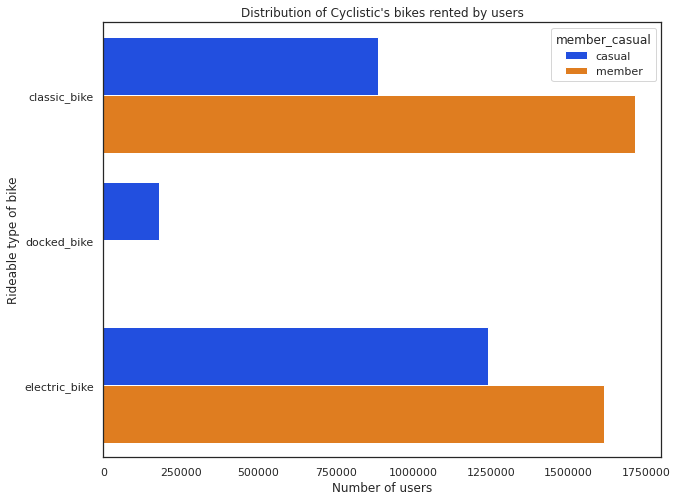

In [ ]:
df8 = df[['rideable_type', 'member_casual', 'ride_id']]
df8 = df8.groupby(['rideable_type', 'member_casual'], as_index=False)[['ride_id']].count()

plt.figure(figsize=(10,8))
sns.set(style='white')
sns.barplot(data=df8, x='ride_id', y='rideable_type', hue='member_casual', 
            palette='bright').set_title("Distribution of Cyclistic's bikes rented by users")

plt.ticklabel_format(style='plain', axis='x')
plt.xlabel('Number of users')
plt.ylabel('Rideable type of bike')
plt.show()

* There are three different rideable types of bike offered by Cyclistic, including classic bike, docked bike and electric bike.
* The above graph clearly shows the preferance of rideable types that casual riders and annual members have.
* Electric bike is the most preferred choice of casual riders, while annual members seem to have no obvious preferance among classic bike and electric bike.
* Only a minority of casual riders consider to rent docked bikes.

## **Stage 6: Act**
The findings indicate that casual riders and annual members use Cyclistic's bikes differently. Compared to annual members, most of casual riders prefer weekends and warmer months to ride using Cyclistic's bikes, especially electric bikes. Because of leisure, they tend to spend more time riding the bikes.
Overall, leisure activity plays an important role in motivating them to pay for Cyclistic's bikes.

### **Recommendations**
In order to encourage more casual riders to join the annual memberships, there are three major recommendations based on their purpose of using bikes to help guide Cyclistic's marketing strategy.
1. Reform the annual membership package in favor of casual riders' behaviour, such as
 * Special offers for members on weekends and in summer
 * A variety of discounts for members with different duration of a ride, and frequency of riding
2. Expend money and resources to invest electric bikes which would be increasingly attractive to casual riders
 * Increase the number of electric bikes available
 * Source new model of bikes which is durable for long riding
3. Organize promotional campaigns in summer aiming at casual riders, focusing on their benefits from saving money with annual memberships and good quality of electric bikes

### **Additional considerations**
If the dataset used in this analysis includes additional information such as demographics and payment details of users, it allows Cyclistic to better understand the casual riders as a targeted customer in order to customize promotional campaigns achieving Cyclistic’s marketing goals.